# Tanzanian Water Pumps

### *Imports*

In [477]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [478]:
values = pd.read_csv('./kaggle/input/pump-it-up-challenge-driven-data/training_Set_values.csv')
labels = pd.read_csv('./kaggle/input/pump-it-up-challenge-driven-data/training_Set_labels.csv')
data = values.merge(labels)

## I. Business Understanding

The Tanzanian Ministry of Water installed tens of thousands water pumps and wanted to know which one were still working and why. For this task, they wanted to be able to predict which one were the most likely to break.

This is a classification task and the success criteria is the accuracy.

Information on the dataset can be found here : https://www.kaggle.com/datasets/sumeetsawant/pump-it-up-challenge-driven-data/data

## II. Data Understanding

### 1. Description of every column

amount_tsh - Total static head (amount water available to waterpoint)

date_recorded- The date the row was entered

funder - Who funded the well

gps_height - Altitude of the well

installer - Organization that installed the well

longitude - GPS coordinate

latitude - GPS coordinate

wpt_name - Name of the waterpoint if there is one

num_private -is it private

basin - Geographic water basin

subvillage - Geographic location

region - Geographic location

region_code - Geographic location (coded)

district_code - Geographic location (coded)

lga - Geographic location

ward - Geographic location²

population - Population around the well

public_meeting- True/False

recorded_by - Group entering this row of data

scheme_management - Who operates the waterpoint

scheme_name- Who operates the waterpoint

permit- If the waterpoint is permitted

construction_year - Year the waterpoint was constructed

extraction_type - The kind of extraction the waterpoint uses

extraction_type_group - The kind of extraction the waterpoint uses

extraction_type_class- The kind of extraction the waterpoint uses

management- How the waterpoint is managed

management_group - How the waterpoint is managed

payment - What the water costs

payment_type - What the water costs

water_quality - The quality of the water

quality_group - The quality of the water

quantity - The quantity of water

quantity_group - The quantity of water

source- The source of the water

source_type - The source of the water

source_class - The source of the water

waterpoint_type - The kind of waterpoint

waterpoint_type_group - The kind of waterpoint

In [479]:
# Here are some function to see what the dataset looks like.
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [480]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [481]:
data.describe(include='all')

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,59400.000000,59400.000000,59400,55763,59400.000000,55745,59400.000000,5.940000e+04,59398,59400.000000,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,NaN,NaN,356,1896,NaN,2145,NaN,NaN,37399,NaN,...,8,6,5,5,10,7,3,7,6,3
top,NaN,NaN,2011-03-15,Government Of Tanzania,NaN,DWE,NaN,NaN,none,NaN,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,NaN,NaN,572,9084,NaN,17402,NaN,NaN,3563,NaN,...,50818,50818,33186,33186,17021,17021,45794,28522,34625,32259
mean,37115.131768,317.650385,NaN,NaN,668.297239,NaN,34.077427,-5.706033e+00,NaN,0.474141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,21453.128371,2997.574558,NaN,NaN,693.116350,NaN,6.567432,2.946019e+00,NaN,12.236230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,-90.000000,NaN,0.000000,-1.164944e+01,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,18519.750000,0.000000,NaN,NaN,0.000000,NaN,33.090347,-8.540621e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37061.500000,0.000000,NaN,NaN,369.000000,NaN,34.908743,-5.021597e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,55656.500000,20.000000,NaN,NaN,1319.250000,NaN,37.178387,-3.326156e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## III. Data Preparation

### 1. Select data

In [482]:
data.recorded_by.value_counts() # Only one value so we can drop this column

recorded_by
GeoData Consultants Ltd    59400
Name: count, dtype: int64

In [483]:
data.drop('recorded_by', axis=1, inplace=True)

In [484]:
# data.drop('amount_tsh', axis=1, inplace=True) # Too many zeros

### 2. Clean data

In [485]:
data.date_recorded = pd.to_datetime(data.date_recorded)
data.region_code = data.region_code.astype('str')
data.district_code = data.district_code.astype('str')

#### a. Missing values

##### i. Numerical features

In [486]:
# Convert values that should be NaN
numerical_features = [
    'amount_tsh',
    'date_recorded',
    'gps_height',
    'longitude',
    'latitude',
    'num_private',
    'population',
    'construction_year']

In [487]:
data[numerical_features].isna().sum()

amount_tsh           0
date_recorded        0
gps_height           0
longitude            0
latitude             0
num_private          0
population           0
construction_year    0
dtype: int64

With further inspection, NaN in numerical features need to be recoded.

In [488]:
null_values = {
    'amount_tsh':0,
    'date_recorded':0,
    'gps_height':0,
    'longitude':0,
    'latitude':-2.000000e-08,
    'num_private':0,
    'population':0,
    'construction_year':0}

for feature, null in null_values.items():
        data[feature] = data[feature].replace(null, np.nan)

In [489]:
# Number of missing values
data[numerical_features].isna().sum()

amount_tsh           41639
date_recorded            0
gps_height           20438
longitude             1812
latitude              1812
num_private          58643
population           21381
construction_year    20709
dtype: int64

In [490]:
# In percentage
data[numerical_features].isna().sum() / 59400 

amount_tsh           0.700993
date_recorded        0.000000
gps_height           0.344074
longitude            0.030505
latitude             0.030505
num_private          0.987256
population           0.359949
construction_year    0.348636
dtype: float64

There are too many NaN values to just removes the rows containing a NaN. 

We have to fill them. Let's fill them with the mean of the same region. It it's still a NaN, we will fill it with the global average

This may not be the best method but its easy and we can alwasy refine it later.

subvillage - Geographic location

region - Geographic location

region_code - Geographic location (coded)

district_code - Geographic location (coded)

lga - Geographic location

ward - Geographic location

In [491]:
# geo_loc_features = ['subvillage', 'region', 'region_code', 'district_code','lga', 'ward']

# for feature in geo_loc_features:
#     print(feature, data[feature].value_counts().size, 'values')

In [492]:
# Groupby 'ward' because it has more values, thus it is more precise.
replacements = data.groupby('ward')[numerical_features].transform('mean')
data[numerical_features] = data[numerical_features].fillna(replacements)

replacements = data.groupby('region')[numerical_features].transform('mean')
data[numerical_features] = data[numerical_features].fillna(replacements)

replacements = data[numerical_features].mean()
data = data.fillna(replacements)


In [493]:
data[numerical_features].isna().sum()

amount_tsh           0
date_recorded        0
gps_height           0
longitude            0
latitude             0
num_private          0
population           0
construction_year    0
dtype: int64

##### i. categorical features

In [494]:
categorical_features= ['basin', 'district_code', 'extraction_type',
       'extraction_type_class', 'extraction_type_group', 'funder',
       'installer', 'lga', 'management', 'management_group', 'payment',
       'payment_type', 'permit', 'public_meeting', 'quality_group',
       'quantity', 'quantity_group', 
       # 'recorded_by', 
       'region',
       'region_code', 'scheme_management', 'scheme_name', 'source',
       'source_class', 'source_type', 'status_group', 'subvillage',
       'ward', 'water_quality', 'waterpoint_type',
       'waterpoint_type_group', 'wpt_name']

data[categorical_features] = data[categorical_features].apply(lambda x: x.astype('str').str.lower().str.strip())
nan_list = ['not known','unknown','none','-','##','not kno','unknown installer'] # List of values that should be NaN
data = data.replace(nan_list, np.nan)

#### b. Outliers

In [495]:
# data.amount_tsh.isna().sum()

In [496]:
# test_data = data[data['amount_tsh'] < 5000]

In [497]:
# _ = plt.boxplot(data['amount_tsh'])

In [498]:
# _ = plt.hist(data['amount_tsh'], bins=50)

### 3. Construct data

In [499]:
# The year of construction is not useful, but the age of the pump is.

data['age'] = data.date_recorded.dt.year - data.construction_year
data['age'] = data.age.astype(int) # construction_year is a float because it is filled with the mean of the region
data.loc[data['age'] < 0, 'age'] = 0

### 4. Format data

Let's scale numerical features and encode categorical features.

In [500]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [501]:
target = data['status_group']
data = data.drop(columns=['date_recorded', 'status_group']) # We don't need the date_recorded anymore

numerical_features.remove('date_recorded') 
categorical_features.remove('status_group')

In [502]:
target = target.replace({'functional':0, 'non functional':1, 'functional needs repair':2})

C:\Users\salla\AppData\Local\Temp\ipykernel_42660\993806021.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target = target.replace({'functional':0, 'non functional':1, 'functional needs repair':2})


In [503]:
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    [
        ('num', scaler, numerical_features),
        ('cat', encoder, categorical_features)
    ]
)

## IV. Modelling

### 0. Dummy classifier

We first use a dummy classifier to compare our future result

In [504]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split


dummy_clf = DummyClassifier(strategy="most_frequent")

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)
dummy_clf.fit(data_train, target_train)
dummy_clf.score(data_test, target_test)

0.5435185185185185

### 1. First model

Here, we will only try one model for the moment. I know that XGBClassifier is a good model for multiclass classification

In [505]:
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

xgbc = XGBClassifier(n_estimators=500, learning_rate=0.1, n_jobs=-1, random_state=42, max_depth=5, objective='multi:softmax', num_class=3)
model = make_pipeline(preprocessor, xgbc)
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount_tsh', 'gps_height',
                                                   'longitude', 'latitude',
                                                   'num_private', 'population',
                                                   'construction_year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['basin', 'district_code',
                                                   'extraction_type',
                                                   'extraction_type_class',
                                                   'extraction_type_group',
                                                   'funder', 'installer',...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=500, n_jobs=-1, num_class=3,
                               num_parallel_tree=None, ...))])

In [506]:
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=42, test_size=0.2)

model.fit(data_train, target_train)
model.score(data_test, target_test)

0.7927609427609428

Training time is a bit long. To improve this, we could remove some features, by either using feature_importances or by plotting the confusion matrix and removing highly correlated features.

<Axes: >

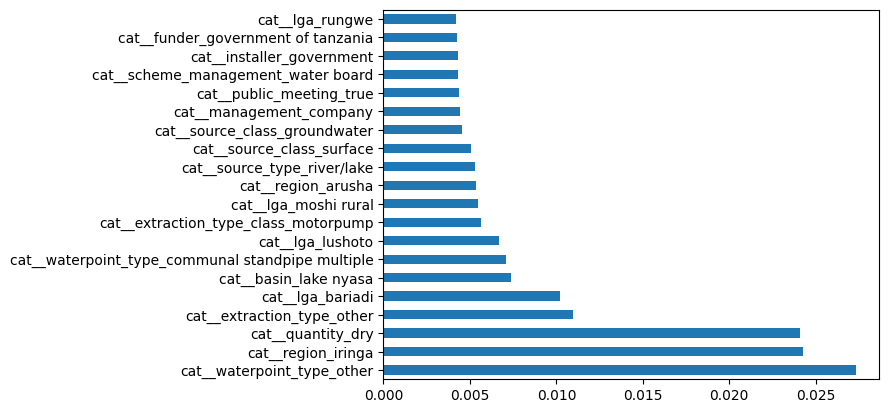

In [507]:
# Let's plot the feature importances

feature_importances = model.steps[1][1].feature_importances_
feature_names = model.steps[0][1].get_feature_names_out()

importances = pd.Series(feature_importances, index=feature_names)
importances.nlargest(20).plot(kind='barh')

# Let's keep the most important features

important_features = importances.nlargest(20).index
important_features


In [508]:
# Let's try with fewer features

categorical_features= ['region', 'quantity', 'waterpoint_type', 'extraction_type']
data = data[categorical_features]

data_train, data_test, target_train, target_test = train_test_split(
    data, target, 
    random_state=42
)
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    [
        ('cat', encoder, categorical_features)
    ]
)

model = make_pipeline(preprocessor, XGBClassifier(objective='multi:softmax', num_class=3, n_estimators=100, learning_rate=0.1, max_depth=10, n_jobs=-1))


target_train = target_train.replace({'functional':0, 'non functional':1, 'functional needs repair':2})
target_test = target_test.replace({'functional':0, 'non functional':1, 'functional needs repair':2})
_ = model.fit(data_train, target_train)
model.score(data_test, target_test)

0.7347474747474747

It's much faster to run but it has a worse score.

To get a more representative score and avoid overfitting, we will need to proceed to cross validation.

### 2. Cross Validation

In [509]:
target.value_counts()

status_group
0    32259
1    22824
2     4317
Name: count, dtype: int64

Because the dataset is not balanced, we need to do a stratified K fold cross validation.

In [510]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []

for train_index, test_index in skf.split(data, target):
    data_train, data_test = data.iloc[train_index], data.iloc[test_index]
    target_train, target_test = target.iloc[train_index], target.iloc[test_index]

    _ = model.fit(data_train, target_train)
    accuracy = model.score(data_test, target_test)
    accuracy_scores.append(accuracy)
    print(f'Fold Accuracy : {accuracy}')

print(f'Mean Accuracy : {np.mean(accuracy_scores)}')

Fold Accuracy : 0.7452861952861953
Fold Accuracy : 0.7367845117845118
Fold Accuracy : 0.7311447811447811
Fold Accuracy : 0.7333333333333333
Fold Accuracy : 0.7361111111111112
Mean Accuracy : 0.7365319865319866


### 3. Finetuning the hyperparameters

In [511]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'xgbclassifier__n_estimators': [100, 500],
    'xgbclassifier__max_depth': [5, 10],
    'xgbclassifier__learning_rate': [0.1, 0.01]
}

grid_search = GridSearchCV(model, param_grid, cv=skf, n_jobs=-1, verbose=2)
grid_search.fit(data, target)

grid_search.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'xgbclassifier__learning_rate': 0.1,
 'xgbclassifier__max_depth': 10,
 'xgbclassifier__n_estimators': 500}

In [512]:
grid_search.best_score_

np.float64(0.737037037037037)

## V. Evaluation

## VI. Deployment